### **EXP-Handling Missing Value:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\PROJECTS\Swiggy Delivery Dataset\train.csv")

In [129]:
df.sample(10)

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
27602  0x91fb      SURRES17DEL01                   24                     4.7   
28695  0x6122      SURRES19DEL03                   31                     4.8   
24039  0x70f8    PUNERES010DEL03                   37                     4.8   
45010  0x858e      JAPRES15DEL01                   36                     4.7   
22755  0x8feb      MYSRES18DEL01                   37                       5   
18020  0x5502     BANGRES16DEL01                   32                     4.7   
37574  0xa40e   RANCHIRES17DEL03                   28                     4.8   
45334  0x80b7      VADRES20DEL03                   31                       5   
10235  0xc840      GOARES11DEL02                   39                     4.7   
28811  0x37b9    COIMBRES05DEL02                   27                     4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
27602            21.149569             72.772697                   21.159569   
28695            21.149669             72.772629                   21.209669   
24039            18.539299             73.897902                   18.629299   
45010            26.891191             75.802083                   26.961191   
22755            12.337928             76.617889                   12.447928   
18020            13.029198             77.570997                   13.139198   
37574            23.374878             85.335739                   23.434878   
45334            22.311358             73.164798                   22.371358   
10235            15.544419             73.755736                   15.624419   
28811            11.022169             76.999594                   11.102169   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
27602                    72.782697  24-03-2022    08:50:00          08:55:00   
28695                    72.832629  11-03-2022    18:40:00          18:55:00   
24039                    73.987902  02-03-2022    18:25:00          18:30:00   
45010                    75.872083  04-04-2022    21:35:00          21:40:00   
22755                    76.727889  14-03-2022    19:30:00          19:35:00   
18020                    77.680997  04-04-2022    19:40:00          19:55:00   
37574                    85.395739  24-03-2022    22:10:00          22:20:00   
45334                    73.224798  17-03-2022    23:00:00          23:05:00   
10235                    73.835736  18-02-2022    17:20:00          17:30:00   
28811                    77.079594  20-03-2022    23:10:00          23:25:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
27602     conditions Fog                 Low                   2   
28695  conditions Cloudy              Medium                   2   
24039   conditions Sunny              Medium                   0   
45010   conditions Windy                 Jam                   0   
22755   conditions Sunny                 Jam                   1   
18020  conditions Cloudy                 Jam                   0   
37574   conditions Windy                 Low                   1   
45334  conditions Stormy                 Low                   2   
10235  conditions Stormy              Medium                   0   
28811  conditions Stormy                 Low                   0   

      Type_of_order Type_of_vehicle multiple_deliveries Festival  \
27602         Meal      motorcycle                    0      No    
28695       Buffet         scooter                    1      No    
24039       Drinks      motorcycle                    0      No    
45010       Drinks      motorcycle                    0      No    
22755       Drinks         scooter                    1      No    
18020         Meal      motorcycle                    3      No    
37574       Drinks      motorcycle                    0      No    
45334       Buffet      motorcycle                    0      No  

In [130]:
def basic_data_cleaning(df):

    df.drop(columns=['ID'],inplace=True)
    df['Restaurant_latitude'] = abs(df['Restaurant_latitude'].replace(0,np.nan))
    df['Restaurant_longitude'] = abs(df['Restaurant_longitude'].replace(0,np.nan))
    cols = ["Delivery_location_latitude","Delivery_location_longitude"]
    df.loc[df['Restaurant_latitude'].isnull(), cols] = np.nan

    columns = ["Delivery_person_Age",  "Delivery_person_Ratings","Time_Orderd", "Weatherconditions", "Road_traffic_density",
    "multiple_deliveries", "Festival", "City"]
    for i in columns:
        df[i] = df[i].replace('NaN ',np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].replace("conditions NaN",np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.split()[-1] if isinstance(x, str) else x)
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x[-2:]).astype("float")

    # changing datatype 
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype("float")
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype("float")
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd']).dt.time      
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked']).dt.time
    df['multiple_deliveries'] = df['multiple_deliveries'].astype("float")

    return df

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [132]:
df = basic_data_cleaning(df)

In [133]:
df.sample(6)

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
19679     SURRES09DEL02                  28.0                      4.5   
25925     HYDRES16DEL01                  23.0                      4.2   
16889    CHENRES12DEL01                   NaN                      NaN   
35229  RANCHIRES02DEL01                  35.0                      4.6   
26723    BANGRES20DEL02                  21.0                      4.8   
30185     ALHRES20DEL01                  28.0                      4.6   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
19679            21.175975             72.795503                   21.255975   
25925            17.440827             78.393391                   17.480827   
16889            12.972793             80.249982                   12.982793   
35229                  NaN                   NaN                         NaN   
26723            12.972161             77.596014                   13.022161   
30185            25.454697             81.834492                   25.494697   

       Delivery_location_longitude Order_Date Time_Orderd Time_Order_picked  \
19679                    72.875503 2022-03-20    21:10:00          21:15:00   
25925                    78.433391 2022-03-11    12:35:00          12:40:00   
16889                    80.259982 2022-04-01         NaT          11:30:00   
35229                          NaN 2022-03-06    23:55:00          00:10:00   
26723                    77.646014 2022-03-01    23:30:00          23:45:00   
30185                    81.874492 2022-02-17    16:40:00          16:50:00   

      Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
19679            Stormy                 Jam                   2       Drinks    
25925            Stormy                High                   0        Snack    
16889        Sandstorms                High                   1        Snack    
35229        Sandstorms                 Low                   0       Buffet    
26723            Cloudy                 Low                   1         Meal    
30185            Stormy              Medium                   2        Snack    

      Type_of_vehicle  multiple_deliveries Festival            City  \
19679        scooter                   0.0      No   Metropolitian    
25925     motorcycle                   1.0      No   Metropolitian    
16889        scooter                   0.0      No           Urban    
35229     motorcycle                   1.0      No           Urban    
26723     motorcycle                   1.0      No   Metropolitian    
30185        scooter                   1.0      No   Metropolitian    

       Time_taken(min)  
19679             24.0  
25925             37.0  
16889             15.0  
35229             28.0  
26723             15.0  
30185             28.0

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45593 non-null  object        
 1   Delivery_person_Age          43739 non-null  float64       
 2   Delivery_person_Ratings      43685 non-null  float64       
 3   Restaurant_latitude          41953 non-null  float64       
 4   Restaurant_longitude         41953 non-null  float64       
 5   Delivery_location_latitude   41953 non-null  float64       
 6   Delivery_location_longitude  41953 non-null  float64       
 7   Order_Date                   45593 non-null  datetime64[ns]
 8   Time_Orderd                  43862 non-null  object        
 9   Time_Order_picked            45593 non-null  object        
 10  Weatherconditions            44977 non-null  object        
 11  Road_traffic_density         44992 non-nu

In [134]:
round(df.isnull().sum()/df.shape[0]*100,2)

Delivery_person_ID             0.00
Delivery_person_Age            4.07
Delivery_person_Ratings        4.18
Restaurant_latitude            7.98
Restaurant_longitude           7.98
Delivery_location_latitude     7.98
Delivery_location_longitude    7.98
Order_Date                     0.00
Time_Orderd                    3.80
Time_Order_picked              0.00
Weatherconditions              1.35
Road_traffic_density           1.32
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            2.18
Festival                       0.50
City                           2.63
Time_taken(min)                0.00
dtype: float64

<Axes: >

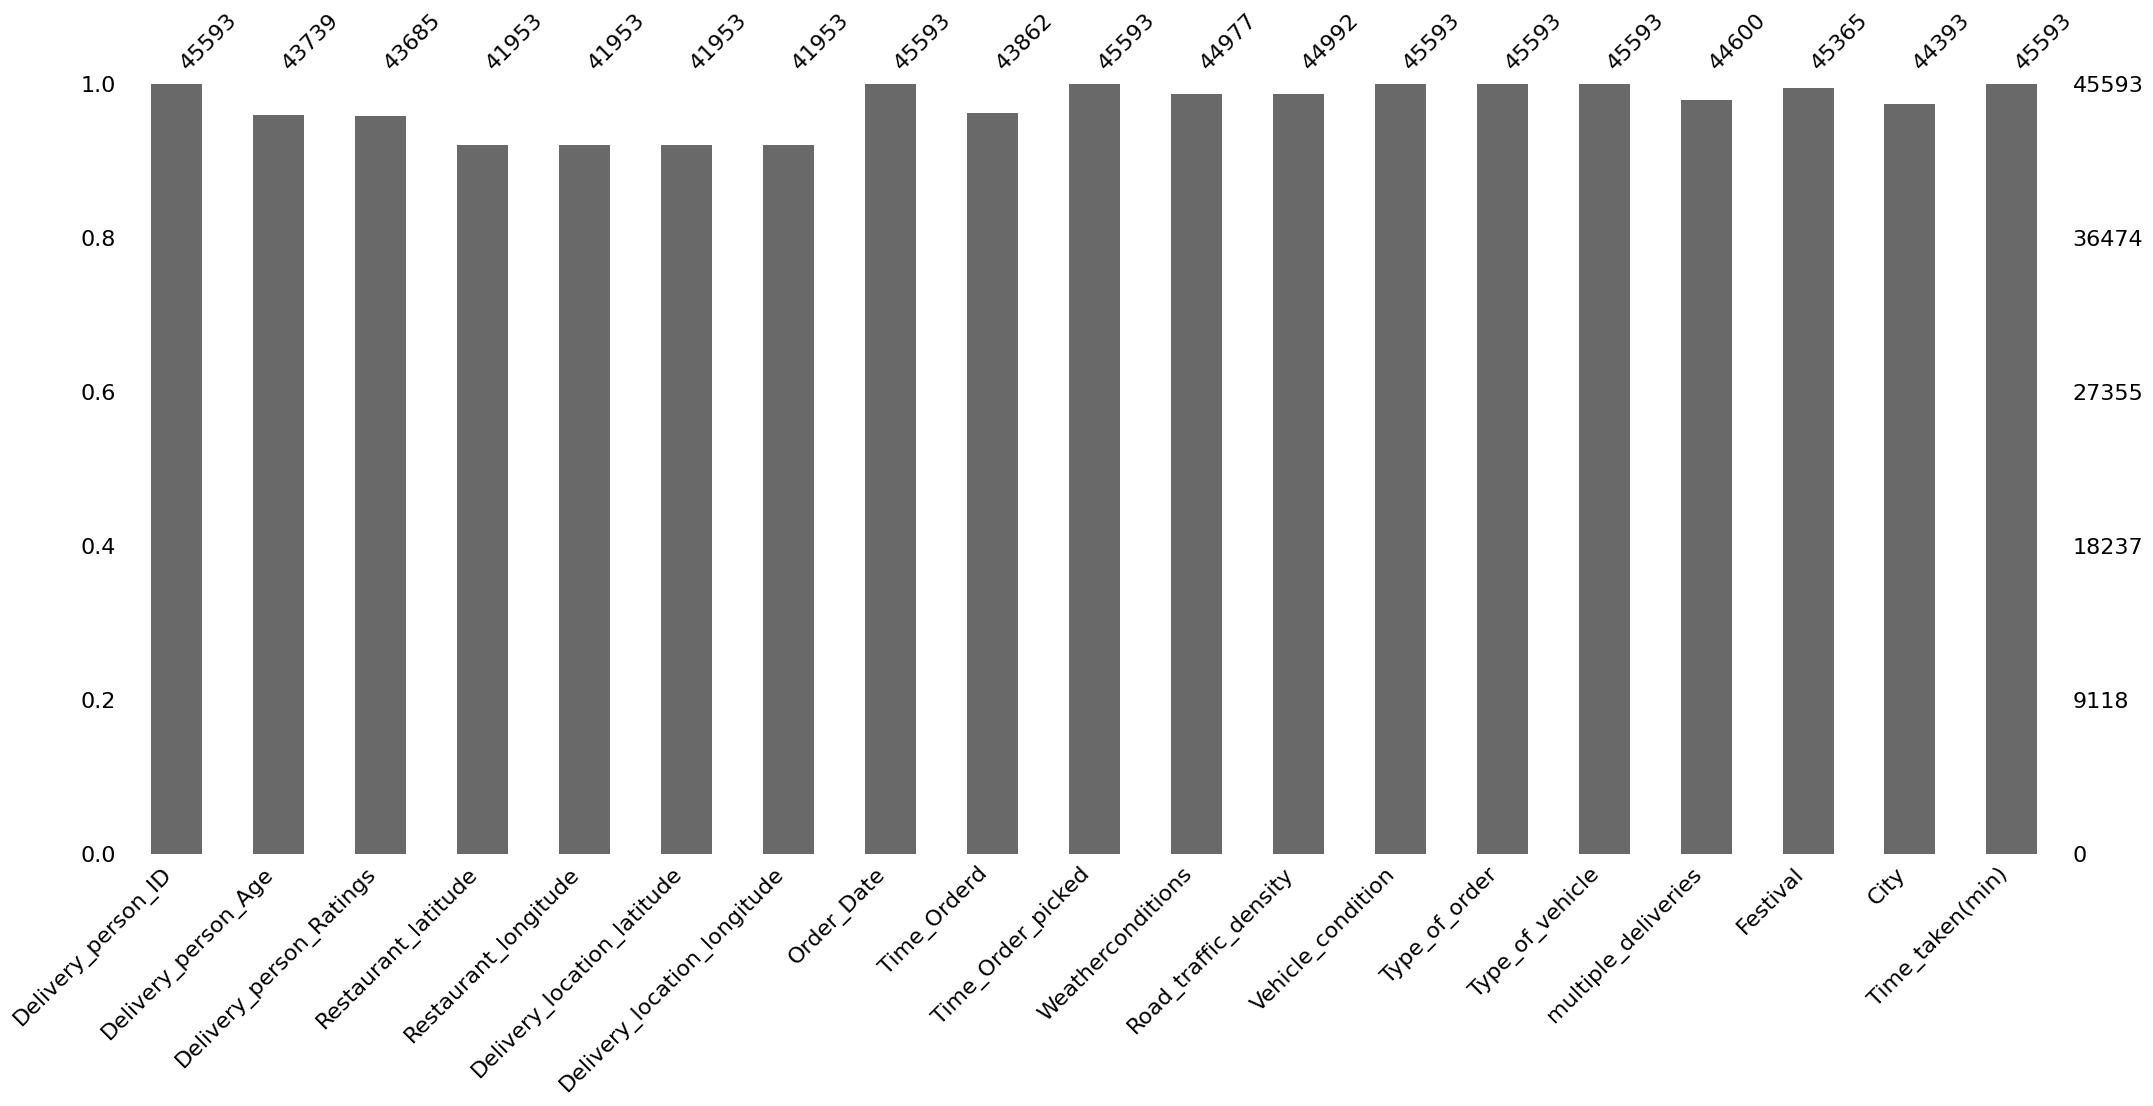

In [8]:
msn.bar(df)

<Axes: >

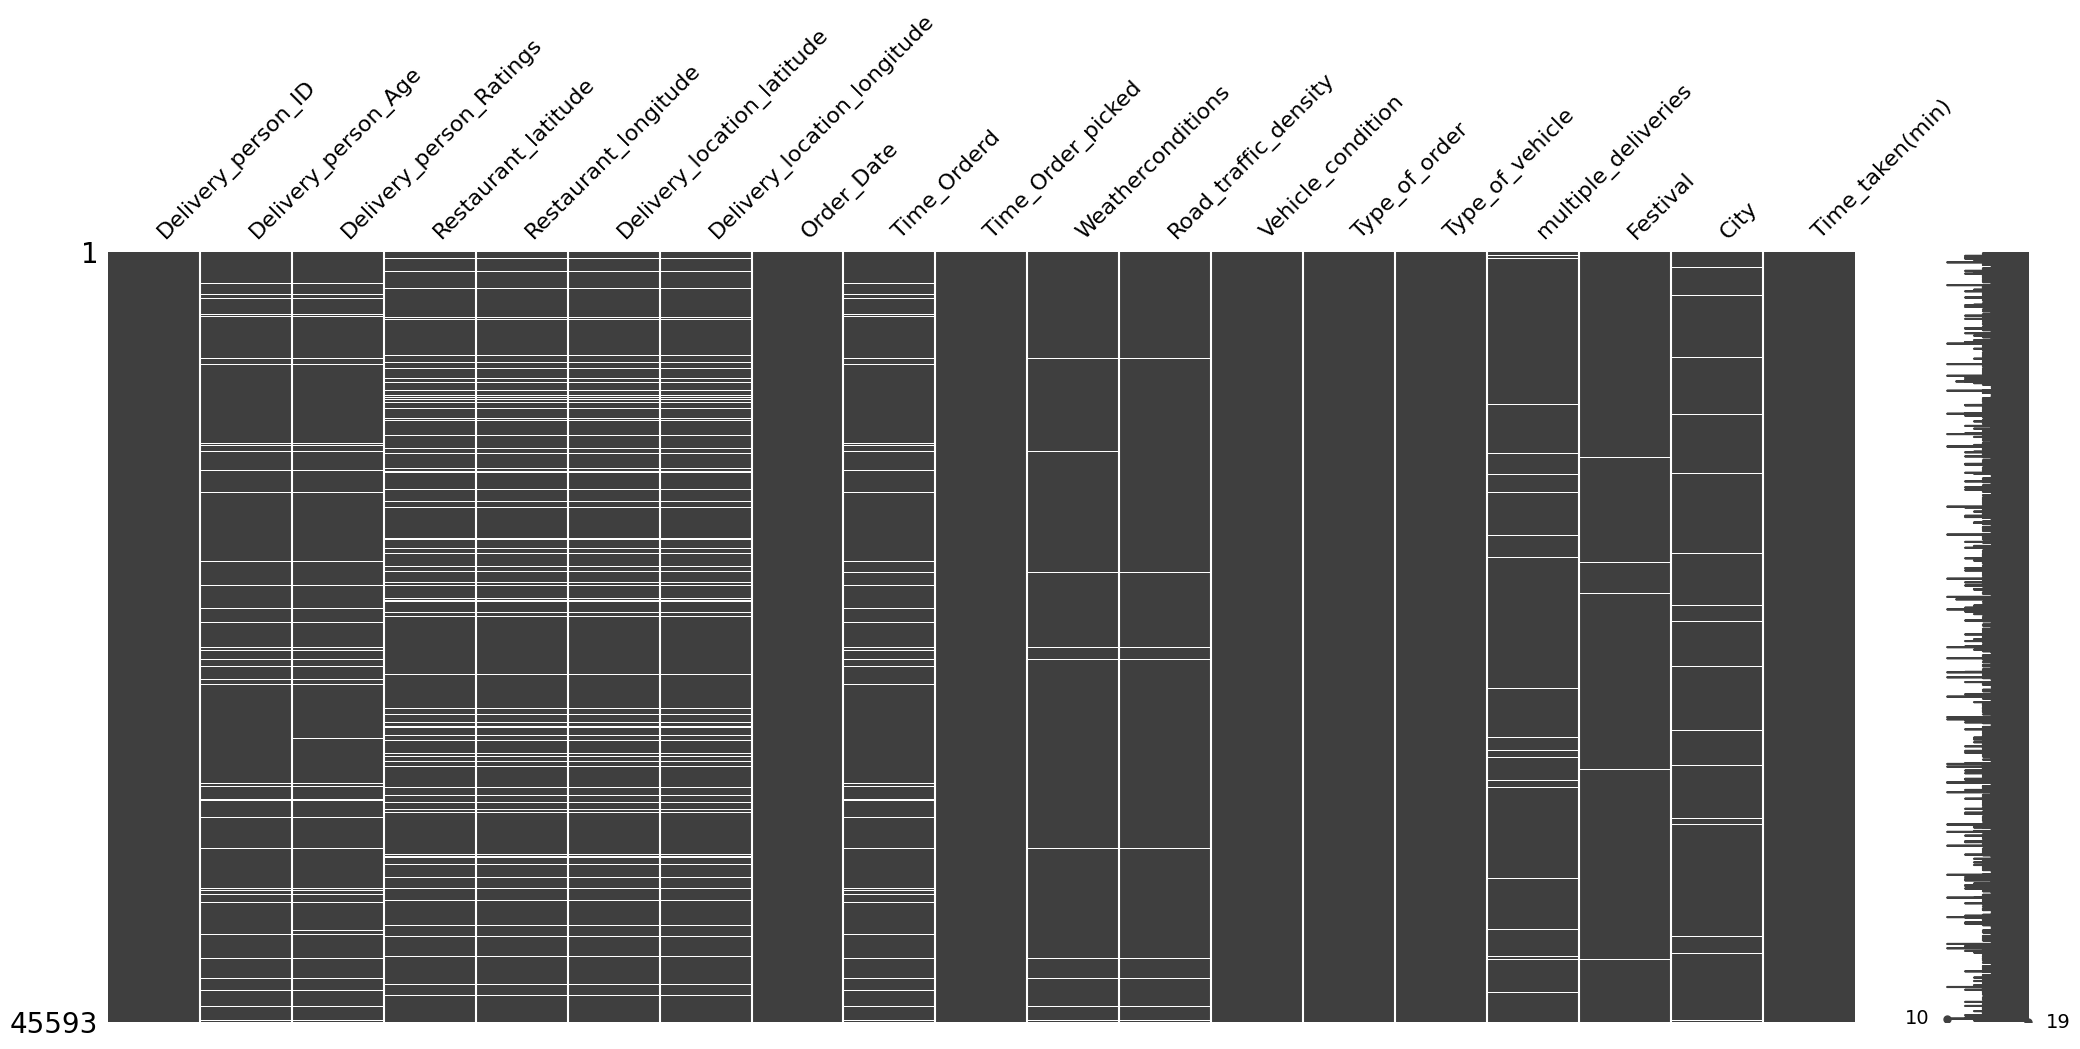

In [9]:
msn.matrix(df)

<Axes: >

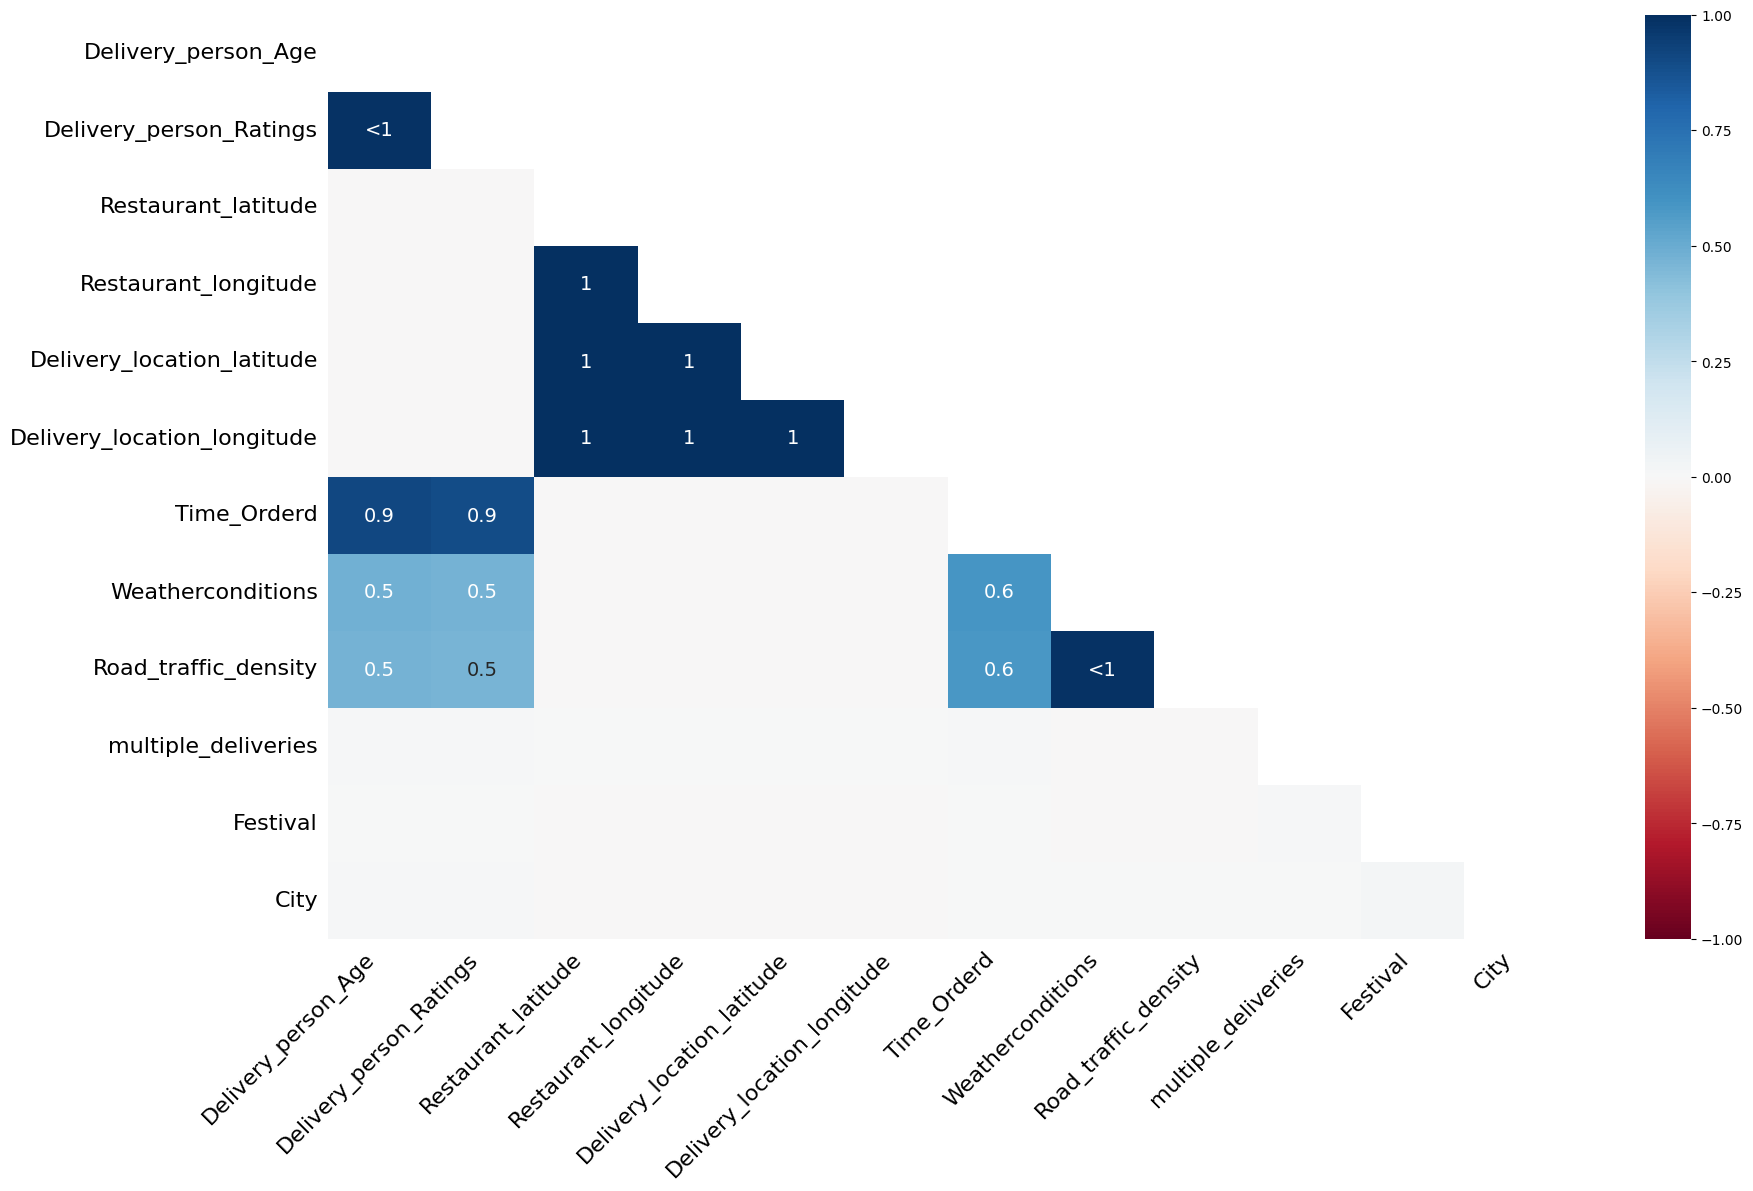

In [10]:
msn.heatmap(df)

<Axes: >

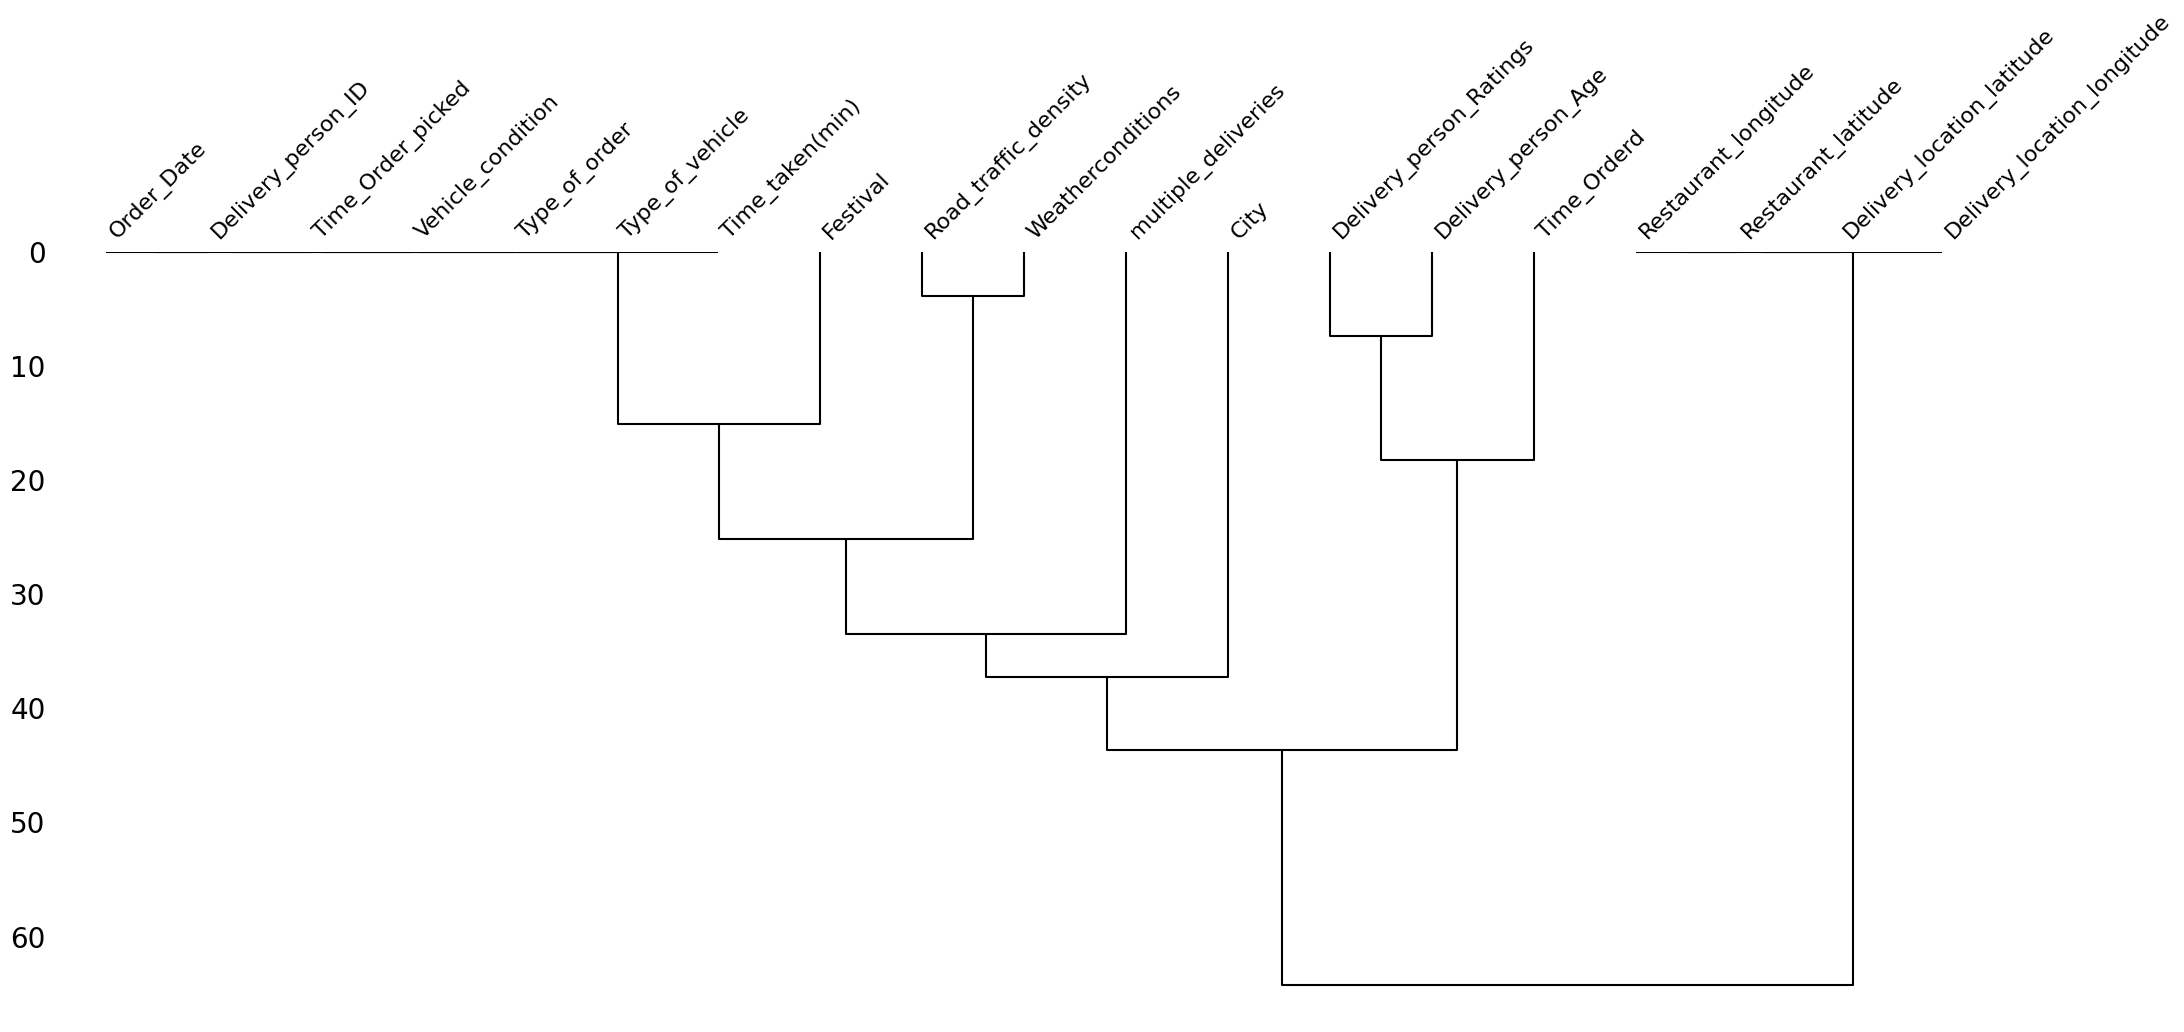

In [11]:
msn.dendrogram(df)

- So, we can observe that some columns are corelated with each others.

In [12]:
df['City'].value_counts()

City
Metropolitian     34093
Urban             10136
Semi-Urban          164
Name: count, dtype: int64

In [13]:
from plotly.subplots import make_subplots

City  count
0  Metropolitian   34093
1          Urban   10136
2     Semi-Urban     164

In [28]:
most_freq = df.City.mode()[0]
most_freq

'Metropolitian '

In [34]:
fig = make_subplots(rows=1,cols=2,subplot_titles=['Before Imputation','After Imputation with most frequent value'])


fig.add_trace(go.Histogram(x=df['City']),row=1,col=1)
fig.add_trace(go.Histogram(x=df['City'].fillna(most_freq),marker={'color':"green"}),row=1,col=2)

fig.update_layout(title = {"text":"City column Imputation Analysis:","x":0.5,"xanchor":"center"},font = {"family":"arial black"},width = 1000, height = 500)

fig.show()



- We can observe that by imputing with most-frequent items, there is no change in distributions. 

    - So for city we will use simpleImputer with most-frequent value for `City` column. 

#### Column - fastival:

In [38]:
df[["Festival","Time_taken(min)"]].groupby(by=['Festival']).mean()

Time_taken(min)
Festival                 
No              25.984843
Yes             45.517857

In [41]:
df[df['Festival'].isnull()][["Time_taken(min)"]].mean()

Time_taken(min)    11.166667
dtype: float64

- I have observed that time taken for `NaN` value is less than both for `yes` & `no` value.

    - so we can simply impute with `No`.  which is also the mode of this column.

In [43]:
df['Festival'].mode()

0    No 
Name: Festival, dtype: object

#### Column - Multiple_deliveries & weathercondition:

In [46]:
df[["multiple_deliveries","Time_taken(min)"]].groupby(by=['multiple_deliveries']).mean().reset_index()

multiple_deliveries  Time_taken(min)
0                   0        22.876268
1                   1        26.855890
2                   2        40.454912
3                   3        47.819945

In [47]:
df[df['multiple_deliveries'].isnull()][["Time_taken(min)"]].mean()

Time_taken(min)    22.767372
dtype: float64

So from here I have concuded that we can fill `NaN` value with '0'.

#### Column - Road_traffic_density:

In [51]:
df[["Road_traffic_density","Time_taken(min)"]].groupby(by=['Road_traffic_density']).mean().reset_index()

Road_traffic_density  Time_taken(min)
0                High         27.240000
1                 Jam         31.176624
2                 Low         21.266977
3              Medium         26.699644

In [52]:
df[df['Road_traffic_density'].isnull()][["Time_taken(min)"]].mean()

Time_taken(min)    26.542429
dtype: float64

In [53]:
df[["Weatherconditions","Time_taken(min)"]].groupby(by=['Weatherconditions']).mean().reset_index()

Weatherconditions  Time_taken(min)
0            Cloudy        28.917330
1               Fog        28.916122
2        Sandstorms        25.875517
3            Stormy        25.870815
4             Sunny        21.856947
5             Windy        26.118836

In [54]:
df[df['Weatherconditions'].isnull()][["Time_taken(min)"]].mean()

Time_taken(min)    26.545455
dtype: float64

In [55]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
Name: count, dtype: int64

In [58]:
df['Road_traffic_density'].isnull().sum(), df['Weatherconditions'].isnull().sum()

(np.int64(601), np.int64(616))

In [57]:
most_freq_tra = df.Road_traffic_density.mode()[0]
most_freq_weather = df.Weatherconditions.mode()[0]

most_freq_tra, most_freq_weather

('Low ', 'Fog')

In [76]:
fig = make_subplots(rows=2,cols=2,subplot_titles=['Before Imputation-Road Trafic','After Imputation with most frequent value-Weather Conditions','Before Imputation-Road Trafic','After Imputation with most frequent value-Weather Conditions'])


fig.add_trace(go.Histogram(x=df['Road_traffic_density']),row=1,col=1)
fig.add_trace(go.Histogram(x=df['Road_traffic_density'].fillna(most_freq_tra),marker={'color':"green"},opacity=0.7),row=1,col=2)

fig.add_trace(go.Histogram(x=df['Weatherconditions']),row=2,col=1)
fig.add_trace(go.Histogram(x=df['Weatherconditions'].fillna(most_freq_weather),marker={'color':"purple"},opacity=0.7),row=2,col=2)

fig.update_layout(title = {"text":"Weatherconditions & Road_traffic_density column Imputation Analysis:","x":0.5,"xanchor":"center"},font = {"family":"arial black"},width = 1000, height = 600)

fig.show()

- Here also we can impute with most_freq values for both of these columns.

#### column - Delivery_person_Ratings:

In [72]:
df['Delivery_person_Ratings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Ratings
Non-Null Count  Dtype 
--------------  ----- 
43685 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


In [ ]:
mean_delivery = df['Delivery_person_Ratings'].astype("float").mean()

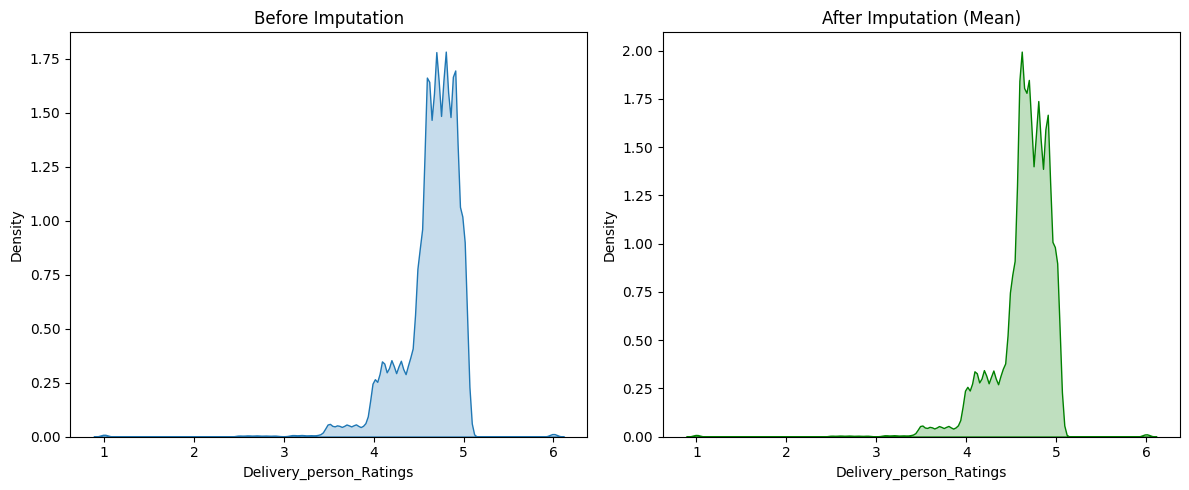

In [82]:
plt.figure(figsize=(12, 5))

# --- Subplot 1: Before Imputation ---
plt.subplot(1, 2, 1)
sns.kdeplot(df['Delivery_person_Ratings'].astype(float), fill=True)
plt.title("Before Imputation")

# --- Subplot 2: After Imputation ---
plt.subplot(1, 2, 2)
sns.kdeplot(df['Delivery_person_Ratings'].astype(float).fillna(mean_delivery), fill=True,color='green')
plt.title("After Imputation (Mean)")

plt.tight_layout()
plt.show()

In [ ]:
df['Delivery_person_Age'].astype("float")

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Delivery_person_Age
Non-Null Count  Dtype 
--------------  ----- 
43739 non-null  object
dtypes: object(1)
memory usage: 356.3+ KB


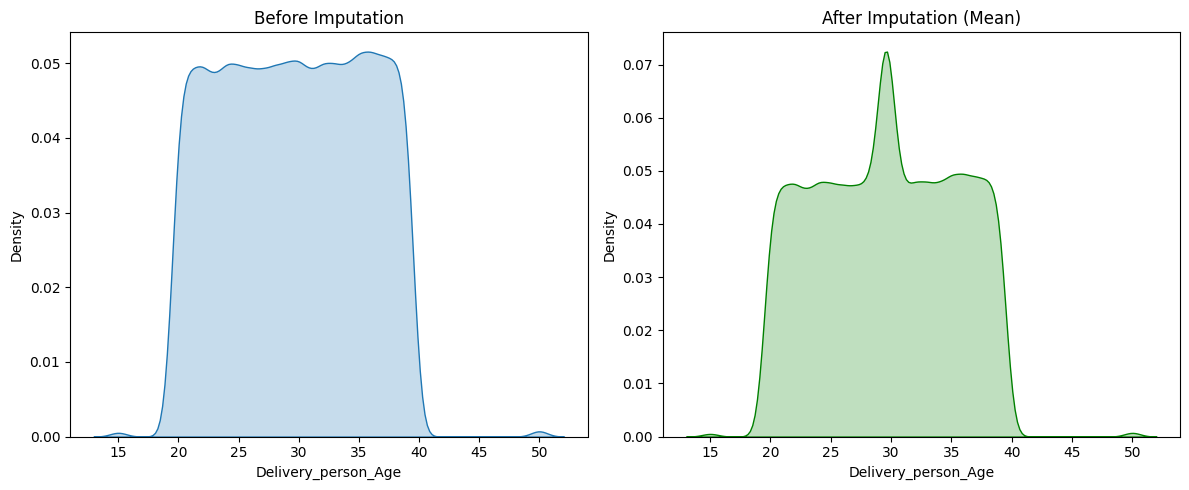

In [136]:
mean_age = df['Delivery_person_Age'].astype("float").mean()
plt.figure(figsize=(12, 5))

# --- Subplot 1: Before Imputation ---
plt.subplot(1, 2, 1)
sns.kdeplot(df['Delivery_person_Age'].astype(float), fill=True)
plt.title("Before Imputation")

# --- Subplot 2: After Imputation ---
plt.subplot(1, 2, 2)
sns.kdeplot(df['Delivery_person_Age'].astype(float).fillna(mean_age), fill=True,color='green')
plt.title("After Imputation (Mean)")

plt.tight_layout()
plt.show()

- So we can observe that if we impute with mean values then the distribution will change. So for age column we have to try with other imputaiton techniques.

### **Summary:**

In [215]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude            3640
Restaurant_longitude           3640
Delivery_location_latitude     3640
Delivery_location_longitude    3640
Distance_res_loc_KM            3640
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Time_res_pickup                1731
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

Total there are 12 columns where missing values are introduced. It is decided that --

- 


In [214]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Distance_res_loc_KM', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Time_res_pickup', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45593 non-null  object        
 1   Delivery_person_Age          43739 non-null  float64       
 2   Delivery_person_Ratings      43685 non-null  float64       
 3   Restaurant_latitude          41953 non-null  float64       
 4   Restaurant_longitude         41953 non-null  float64       
 5   Delivery_location_latitude   41953 non-null  float64       
 6   Delivery_location_longitude  41953 non-null  float64       
 7   Distance_res_loc_KM          41953 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Time_res_pickup              43862 non-nu

In [139]:
import haversine as hs

In [142]:
def haversine_row(row):
    loc1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    loc2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return hs.haversine(loc1, loc2, unit=hs.Unit.KILOMETERS)

In [145]:
df['Distance_res_to_loc'] = df[['Restaurant_latitude', 'Restaurant_longitude','Delivery_location_latitude', 'Delivery_location_longitude']].apply(haversine_row,axis=1)

In [147]:
df.insert(7,"Distance_res_loc",df.pop('Distance_res_to_loc'))

In [148]:
df

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0        INDORES13DEL02                  37.0                      4.9   
1        BANGRES18DEL02                  34.0                      4.5   
2        BANGRES19DEL01                  23.0                      4.4   
3       COIMBRES13DEL02                  38.0                      4.7   
4        CHENRES12DEL01                  32.0                      4.6   
...                  ...                  ...                      ...   
45588     JAPRES04DEL01                  30.0                      4.8   
45589     AGRRES16DEL01                  21.0                      4.6   
45590    CHENRES08DEL03                  30.0                      4.9   
45591   COIMBRES11DEL01                  20.0                      4.7   
45592  RANCHIRES09DEL02                  23.0                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589                  NaN                   NaN                         NaN   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Distance_res_loc Order_Date Time_Orderd  \
0                        75.912471          3.025153 2022-03-19    11:30:00   
1                        77.813237         20.183558 2022-03-25    19:45:00   
2                        77.688400          1.552760 2022-03-19    08:30:00   
3                        77.026494          7.790412 2022-04-05    18:00:00   
4                        80.289982          6.210147 2022-03-26    13:30:00   
...                            ...               ...        ...         ...   
45588                    75.804257          1.489848 2022-03-24    11:35:00   
45589                          NaN               NaN 2022-02-16    19:55:00   
45590                    80.272439          4.657202 2022-03-11    23:50:00   
45591                    77.026241          6.232402 2022-03-07    13:35:00   
45592                    85.405731         12.074412 2022-03-02    17:10:00   

      Time_Order_picked Weatherconditions Road_traffic_density  \
0              11:45:00             Sunny                High    
1              19:50:00            Stormy                 Jam    
2              08:45:00        Sandstorms                 Low    
3              18:10:00             Sunny              Medium    
4              13:45:00            Cloudy                High    
...                 ...               ...                  ...   
45588          11:45:00             Windy                High    
45589          20:10:00             Windy                 Jam    
45590          00:05:00            Cloudy                 Low    
45591          13:40:00            Cloudy                High    
45592          17:15:00               Fog              Medium    

       Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries  \
0                      2        Snack      motorcycle                   0.0   
1                      2        Snack         scooter                   1.0   
2                      0       Drinks      motorcycle                   1.0   
3                      0       Buffet      motorcycle                   1.0   
4                  

In [167]:
(pd.to_timedelta(df['Time_Order_picked'].astype("str"))-pd.to_timedelta(df['Time_Orderd'].astype("str"))).astype("str").apply(lambda x: x[-8:]).replace({'00:15:00':15.00,"00:05:00":5.00,"00:10:00":10.00,"NaT":np.nan}).astype(float).unique()

array([15.,  5., 10., nan])

In [ ]:
def time_diff(row):

    order_picked = pd.to_timedelta(row['Time_Order_picked'])
    time_order =  pd.to_timedelta(row['Time_Orderd'])

    x = order_picked - time_order
    return x

In [192]:
df[['Time_Order_picked','Time_Orderd']].apply(time_diff,axis=1).unique()

<TimedeltaArray>
[  '0 days 00:15:00',   '0 days 00:05:00',   '0 days 00:10:00',
                 NaT, '-1 days +00:15:00', '-1 days +00:10:00',
 '-1 days +00:05:00']
Length: 7, dtype: timedelta64[ns]

In [197]:
df["Time_res_pickup"] = (df[['Time_Order_picked','Time_Orderd']].apply(time_diff,axis=1).dt.total_seconds()/60).replace({
    -1425.:15., -1430.:10., -1435.:5.
})

In [202]:
df.insert(11,"Time_res_pickup",df.pop("Time_res_pickup"))

In [204]:
df.iloc[:10,:14]

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0    INDORES13DEL02                  37.0                      4.9   
1    BANGRES18DEL02                  34.0                      4.5   
2    BANGRES19DEL01                  23.0                      4.4   
3   COIMBRES13DEL02                  38.0                      4.7   
4    CHENRES12DEL01                  32.0                      4.6   
5     HYDRES09DEL03                  22.0                      4.8   
6  RANCHIRES15DEL01                  33.0                      4.7   
7     MYSRES15DEL02                  35.0                      4.6   
8     HYDRES05DEL02                  22.0                      4.8   
9     DEHRES17DEL01                  36.0                      4.2   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   
5            17.431668             78.408321                   17.461668   
6            23.369746             85.339820                   23.479746   
7            12.352058             76.606650                   12.482058   
8            17.433809             78.386744                   17.563809   
9            30.327968             78.046106                   30.397968   

   Delivery_location_longitude  Distance_res_loc_KM Order_Date Time_Orderd  \
0                    75.912471             3.025153 2022-03-19    11:30:00   
1                    77.813237            20.183558 2022-03-25    19:45:00   
2                    77.688400             1.552760 2022-03-19    08:30:00   
3                    77.026494             7.790412 2022-04-05    18:00:00   
4                    80.289982             6.210147 2022-03-26    13:30:00   
5                    78.438321             4.610372 2022-03-11    21:20:00   
6                    85.449820            16.600384 2022-03-04    19:15:00   
7                    76.736650            20.205281 2022-03-14    17:25:00   
8                    78.516744            19.975548 2022-03-20    20:55:00   
9                    78.116106            10.280596 2022-02-12    21:55:00   

  Time_Order_picked  Time_res_pickup Weatherconditions Road_traffic_density  
0          11:45:00             15.0             Sunny                High   
1          19:50:00              5.0            Stormy                 Jam   
2          08:45:00             15.0        Sandstorms                 Low   
3          18:10:00             10.0             Sunny              Medium   
4          13:45:00             15.0            Cloudy                High   
5          21:30:00             10.0            Cloudy                 Jam   
6          19:30:00             15.0               Fog                 Jam   
7          17:30:00              5.0            Cloudy              Medium   
8          21:05:00             10.0            Stormy                 Jam   
9          22:10:00             15.0               Fog                 Jam

In [205]:
def time_diff(row):

    order_picked = pd.to_timedelta(row['Time_Order_picked'])
    time_order =  pd.to_timedelta(row['Time_Orderd'])

    x = order_picked - time_order
    return x

def haversine_row(row):
    loc1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    loc2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return hs.haversine(loc1, loc2, unit=hs.Unit.KILOMETERS)



def basic_data_cleaning(df):

    df.drop(columns=['ID'],inplace=True)
    df['Restaurant_latitude'] = abs(df['Restaurant_latitude'].replace(0,np.nan))
    df['Restaurant_longitude'] = abs(df['Restaurant_longitude'].replace(0,np.nan))
    cols = ["Delivery_location_latitude","Delivery_location_longitude"]
    df.loc[df['Restaurant_latitude'].isnull(), cols] = np.nan

    columns = ["Delivery_person_Age",  "Delivery_person_Ratings","Time_Orderd", "Weatherconditions", "Road_traffic_density",
    "multiple_deliveries", "Festival", "City"]
    for i in columns:
        df[i] = df[i].replace('NaN ',np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].replace("conditions NaN",np.nan)
    df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.split()[-1] if isinstance(x, str) else x)
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: x[-2:]).astype("float")

    # changing datatype 
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype("float")
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype("float")
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df['multiple_deliveries'] = df['multiple_deliveries'].astype("float")

    # applying harversine distance
    df['Distance_res_to_loc_KM'] = df[['Restaurant_latitude', 'Restaurant_longitude','Delivery_location_latitude', 'Delivery_location_longitude']].apply(haversine_row,axis=1)
    df.insert(7,"Distance_res_loc_KM",df.pop('Distance_res_to_loc_KM'))

    # finding the time taken between restrurant & order pickup
    df["Time_res_pickup"] = (df[['Time_Order_picked','Time_Orderd']].apply(time_diff,axis=1).dt.total_seconds()/60).replace({-1425.:15., -1430.:10., -1435.:5.})
    df.insert(11,"Time_res_pickup",df.pop("Time_res_pickup"))

    return df

In [206]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\PROJECTS\Swiggy Delivery Dataset\train.csv")

In [207]:
df.sample(8)

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
6470    0x624     BANGRES02DEL02                 NaN                     NaN    
28137  0x1d25      VADRES18DEL03                   29                     4.7   
28918  0xc778     AURGRES01DEL01                   39                     4.9   
13981  0x7b87    COIMBRES19DEL01                   39                     4.9   
30313  0xbf3a      BHPRES19DEL03                 NaN                     NaN    
24293  0x5752   RANCHIRES07DEL02                   32                     4.8   
33159  0xcb29      BHPRES04DEL02                   38                     4.9   
21192  0x8bfd      MUMRES19DEL02                   30                     4.8   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
6470            -12.970221             77.645396                   12.990221   
28137             0.000000              0.000000                    0.030000   
28918            19.876219             75.346017                   19.986219   
13981            11.022298             76.998349                   11.032298   
30313             0.000000              0.000000                    0.090000   
24293            23.359407             85.325055                   23.409407   
33159            23.184992             77.417227                   23.314992   
21192            19.131141             72.813074                   19.181141   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
6470                     77.665396  01-03-2022        NaN           10:45:00   
28137                     0.030000  13-03-2022    19:30:00          19:35:00   
28918                    75.456017  14-02-2022    18:55:00          19:05:00   
13981                    77.008349  01-04-2022    11:35:00          11:50:00   
30313                     0.090000  18-02-2022        NaN           18:30:00   
24293                    85.375055  28-03-2022    20:50:00          20:55:00   
33159                    77.547227  18-02-2022    23:25:00          23:40:00   
21192                    72.863074  03-03-2022    17:55:00          18:10:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
6470      conditions NaN                 NaN                   3   
28137  conditions Stormy                 Jam                   2   
28918  conditions Stormy              Medium                   0   
13981     conditions Fog                High                   0   
30313     conditions NaN                 NaN                   3   
24293     conditions Fog                 Jam                   2   
33159   conditions Windy                 Low                   2   
21192  conditions Cloudy              Medium                   1   

      Type_of_order    Type_of_vehicle multiple_deliveries Festival  \
6470         Snack            scooter                    0      No    
28137        Snack            scooter                    1      No    
28918       Drinks         motorcycle                    1      No    
13981         Meal         motorcycle                    1      No    
30313       Drinks   electric_scooter                    2     Yes    
24293         Meal            scooter                    1      No    
33159         Meal            scooter                    0      No    
21192        Snack         motorcycle                    1      No    

                 City Time_taken(min)  
6470   Metropolitian         (min) 29  
28137  Metropolitian         (min) 29  
28918  Metropolitian         (min) 37  
13981  Metropolitian         (min) 26  
30313  Metropolitian         (min) 49  
24293  Metropolitian         (min) 28  
33159  Metropolitian         (min) 18  
21192  Metropolitian         (min) 16

In [208]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [210]:
df = basic_data_cleaning(df)

In [211]:
df.sample(8)

Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
25024    INDORES15DEL03                  24.0                      4.9   
36604     SURRES09DEL02                  23.0                      4.8   
22549    BANGRES14DEL01                  34.0                      4.7   
38459     MUMRES14DEL02                  24.0                      3.6   
7768    COIMBRES20DEL01                  38.0                      4.9   
45245    BANGRES15DEL01                  20.0                      4.5   
2581      SURRES09DEL01                  35.0                      4.6   
32781     VADRES09DEL02                  23.0                      4.8   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
25024            22.760072             75.892574                   22.820072   
36604            21.175975             72.795503                   21.305975   
22549            12.949934             77.699386                   12.959934   
38459            19.181300             72.836191                   19.201300   
7768             10.994136             76.963303                   11.004136   
45245            12.975377             77.696664                   13.045377   
2581             21.175975             72.795503                   21.285975   
32781                  NaN                   NaN                         NaN   

       Delivery_location_longitude  Distance_res_loc_KM Order_Date  \
25024                    75.952574             9.074390 2022-03-21   
36604                    72.925503            19.760771 2022-03-25   
22549                    77.709386             1.552652 2022-03-24   
38459                    72.856191             3.058929 2022-03-07   
7768                     76.973303             1.558159 2022-03-21   
45245                    77.766664            10.867381 2022-04-06   
2581                     72.905503            16.721180 2022-03-20   
32781                          NaN                  NaN 2022-03-13   

      Time_Orderd  ... Time_res_pickup  Weatherconditions  \
25024    22:40:00  ...             5.0              Windy   
36604    19:15:00  ...            15.0                Fog   
22549    10:10:00  ...            15.0                Fog   
38459    11:50:00  ...             5.0              Sunny   
7768     08:30:00  ...            10.0              Sunny   
45245    18:50:00  ...            15.0             Stormy   
2581     21:10:00  ...            15.0                Fog   
32781    22:15:00  ...             5.0                Fog   

      Road_traffic_density Vehicle_condition  Type_of_order Type_of_vehicle  \
25024                 Low                  2        Buffet         scooter    
36604                 Jam                  2         Snack         scooter    
22549                 Low                  1        Buffet         scooter    
38459                High                  0        Buffet      motorcycle    
7768                  Low                  1        Buffet      motorcycle    
45245              Medium                  0        Buffet      motorcycle    
2581                  Jam                  0         Snack      motorcycle    
32781                 Low                  2        Buffet         scooter    

      multiple_deliveries  Festival            City Time_taken(min)  
25024                 0.0       No   Metropolitian             19.0  
36604                 0.0       No   Metropolitian             32.0  
22549                 0.0       No   Metropolitian             19.0  
38459                 1.0       No   Metropolitian             44.0  
7768                  1.0       No           Urban             17.0  
45245                 0.0       No           Urban             21.0  
2581                  1.0       No   Metropolitian             45.0  
32781                 0.0       No           Urban             12.0  

[8 rows x 21 columns]

In [212]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude            3640
Restaurant_longitude           3640
Delivery_location_latitude     3640
Delivery_location_longitude    3640
Distance_res_loc_KM            3640
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Time_res_pickup                1731
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           45593 non-null  object        
 1   Delivery_person_Age          43739 non-null  float64       
 2   Delivery_person_Ratings      43685 non-null  float64       
 3   Restaurant_latitude          41953 non-null  float64       
 4   Restaurant_longitude         41953 non-null  float64       
 5   Delivery_location_latitude   41953 non-null  float64       
 6   Delivery_location_longitude  41953 non-null  float64       
 7   Distance_res_loc_KM          41953 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Time_res_pickup              43862 non-nu

## **Summary**
### **Treatment of Imputation columns:**

- Delivery_person_age : Have to test diff technique like knn, iter

- delivery_rating: mean

- Distance_res_loc_KM: have to test diff techniques

- time_ordered: we may drop this

- Time_res_pickup: have to test diff techniques

- Weatherconditions: most freq

- Road_traffic_density: most freq

- multiple_deliveries: with 0

- city: most freq->Metropolitan

- festival: most freq -> no

- other 4 columns (long & lati) we may drop these cols.

___________________________________________________________________